In [10]:
import json
import os

In [11]:
augmentation_data_path = '/root/media/legg/data-850-evo/json_data_augmentation_20200820'
training_split_path = '/root/home/legg/data_alfred/splits/sample_failed_20200820_filtered.json'

In [12]:
with open(training_split_path, 'r') as f:
    split = json.load(f)
    
print(split.keys())
print(len(split['augmentation']))
print(split['augmentation'][0])

dict_keys(['augmentation'])
7570
{'task': 'look_at_obj_in_light-BaseballBat-None-DeskLamp-301/trial_T20200814_164125_595727', 'repeat_idx': 0, 'full_traj_success': False, 'collected_subgoals': 2}


In [24]:
task = split['augmentation'][0]
explainer_p = os.path.join(augmentation_data_path, task['task'], 'pp_explainer', 'ann_0.json')
explainer_auxonly_p = os.path.join(augmentation_data_path, task['task'], 'pp_explainer_auxonly', 'ann_0.json')
baseline_p = os.path.join(augmentation_data_path, task['task'], 'pp_baseline', 'ann_0.json')

print(explainer_p)
print(explainer_auxonly_p)
print(baseline_p)

/root/media/legg/data-850-evo/json_data_augmentation_20200820/look_at_obj_in_light-BaseballBat-None-DeskLamp-301/trial_T20200814_164125_595727/pp_explainer/ann_0.json
/root/media/legg/data-850-evo/json_data_augmentation_20200820/look_at_obj_in_light-BaseballBat-None-DeskLamp-301/trial_T20200814_164125_595727/pp_explainer_auxonly/ann_0.json
/root/media/legg/data-850-evo/json_data_augmentation_20200820/look_at_obj_in_light-BaseballBat-None-DeskLamp-301/trial_T20200814_164125_595727/pp_baseline/ann_0.json


In [15]:
with open(explainer_p, 'r') as f:
    explainer_traj = json.load(f)

In [16]:
explainer_traj.keys()

dict_keys(['ann', 'baseline_annotations', 'dataset_params', 'explainer_annotations', 'images', 'num', 'pddl_params', 'pddl_state', 'plan', 'repeat_idx', 'root', 'scene', 'split', 'task_id', 'task_type', 'template'])

In [17]:
explainer_traj['baseline_annotations']

{'anns': [{'high_descs': ['look down at the end of the table .',
    'pick up the phone on the right side of the desk .'],
   'task_desc': 'pick up the freezer , turn on the lamp'}]}

In [27]:
task = split['augmentation'][0]
traj_p = os.path.join(augmentation_data_path, task['task'], 'traj_data.json')

with open(traj_p, 'r') as f:
    traj = json.load(f)

In [28]:
traj.keys()

dict_keys(['dataset_params', 'images', 'num', 'pddl_params', 'pddl_state', 'plan', 'repeat_idx', 'root', 'scene', 'split', 'task_id', 'task_type', 'template', 'baseline_annotations', 'explainer_annotations', 'explainer_auxonly_annotations', 'explainer_enconly_annotations'])

In [45]:
i = 101

task = split['augmentation'][i]
traj_p = os.path.join(augmentation_data_path, task['task'], 'traj_data.json')

with open(traj_p, 'r') as f:
    traj = json.load(f)

print(task)

{'task': 'look_at_obj_in_light-Pen-None-DeskLamp-318/trial_T20200814_213021_115432', 'repeat_idx': 0, 'full_traj_success': True, 'collected_subgoals': 5}


In [46]:
traj['explainer_annotations']

{'anns': [{'task_desc': 'grab the blue pen from the desk , turn on the lamp',
   'high_descs': ['turn right and walk to the wall , then hang a left and walk over to the wooden desk .',
    'pick up the pen on the desk .',
    'turn left and walk to the desk .',
    'turn on the lamp on the desk .']}]}

In [47]:
traj['baseline_annotations']

{'anns': [{'task_desc': 'grab the blue pen from the desk , turn on the lamp',
   'high_descs': ['turn right , walk to the wall , turn left to face the wooden dresser .',
    'pick up the cup from the desk',
    'turn left and walk to the end of the desk on your left .',
    'turn on the lamp that is on the desk .']}]}

In [54]:
for discrete_action in traj['plan']['high_pddl']:
    high_action = discrete_action['discrete_action']['action']
    print(high_action)

GotoLocation
PickupObject
GotoLocation
ToggleObject
NoOp


In [215]:
keys = [
    'GotoLocation', 'PickupObject', 'ToggleObject', 
    'CleanObject', 'CoolObject', 'HeatObject',
    'PutObject', 'SliceObject'
]


comparisons = {k:[] for k in keys}
explainer_lengths = {k:[] for k in keys}
baseline_lengths = {k:[] for k in keys}
objects = set()

for task_i, task in enumerate(split['augmentation']):
    
    traj_p = os.path.join(augmentation_data_path, task['task'], 'traj_data.json')

    with open(traj_p, 'r') as f:
        traj = json.load(f)

    for i, discrete_action in enumerate(traj['plan']['high_pddl']):
        high_action = discrete_action['discrete_action']['action']
        if high_action in keys:
            objs = discrete_action['discrete_action']['args']
            objects = objects | set(objs)
            explainer_annotation = traj['explainer_annotations']['anns'][0]['high_descs'][i]
            baseline_annotations = traj['baseline_annotations']['anns'][0]['high_descs'][i]
            explainer_lengths[high_action].append(len(explainer_annotation.split(' ')))
            baseline_lengths[high_action].append(len(baseline_annotations.split(' ')))
            comparisons[high_action].append((task['task'], objs, explainer_annotation, baseline_annotations))

In [ ]:
# extract a few keys
# 

## Clean

In [181]:
comparisons.keys()

dict_keys(['CleanObject', 'PickupObject'])

In [355]:
import random
random.seed(41)
sample = random.sample(comparisons['PutObject'], 5)
for s in sample:
    print(s[0])
    print('Object:', s[1])
    print('Explainer :', s[2])
    print('Baseline :', s[3])
    print()

pick_and_place_with_movable_recep-PotatoSliced-Pan-Fridge-9/trial_T20200820_193141_899535
Object: ['potato', 'pan']
Explainer : put the potato on the counter
Baseline : place the spatula on the pan on the front left corner of the counter .

pick_and_place_with_movable_recep-Potato-Bowl-CounterTop-19/trial_T20200821_181559_022275
Object: ['potato', 'bowl']
Explainer : put the potato in the fridge
Baseline : put the chilled potato in the microwave .

pick_and_place_with_movable_recep-Fork-Pan-SinkBasin-16/trial_T20200815_162841_181339
Object: ['fork', 'pan']
Explainer : put the fork in the pan on the back left burner .
Baseline : put the knife in the pot on the stove .

pick_and_place_with_movable_recep-DishSponge-Pot-SinkBasin-19/trial_T20200814_190628_780799
Object: ['dishsponge', 'pot']
Explainer : put the sponge on the counter
Baseline : put the sponge in the pan on the right side of the stove .

pick_and_place_with_movable_recep-PotatoSliced-Pan-SinkBasin-6/trial_T20200820_205500_82

In [99]:
len(comparisons['CleanObject'])

209

In [84]:
sum(explainer_lengths['CleanObject'])/len(explainer_lengths['CleanObject'])

15.291866028708133

In [85]:
sum(baseline_lengths['CleanObject'])/len(baseline_lengths['CleanObject'])

17.27751196172249

In [86]:
task = split['augmentation'][4860]
traj_p = os.path.join(augmentation_data_path, task['task'], 'traj_data.json')

with open(os.path.join(augmentation_data_path, task['task'], 'pp_explainer', 'ann_0.json'), 'r') as f:
    explainer_traj = json.load(f)
    
with open(os.path.join(augmentation_data_path, task['task'], 'pp_baseline', 'ann_0.json'), 'r') as f:
    baseline_traj = json.load(f)

In [93]:
explainer_traj.keys()

dict_keys(['ann', 'baseline_annotations', 'dataset_params', 'explainer_annotations', 'images', 'num', 'pddl_params', 'pddl_state', 'plan', 'repeat_idx', 'root', 'scene', 'split', 'task_id', 'task_type', 'template'])

In [97]:
explainer_traj['num']['lang_instr']

[[24, 38, 26, 47, 18, 4, 461, 16],
 [22, 23, 4, 490, 285, 15, 4, 461, 16],
 [24, 38, 26, 47, 18, 4, 149, 16],
 [14,
  4,
  285,
  11,
  4,
  149,
  26,
  24,
  15,
  4,
  179,
  16,
  24,
  115,
  4,
  179,
  26,
  22,
  23,
  4,
  282,
  16],
 [24, 25, 26, 47, 18, 4, 265, 16],
 [34]]

In [98]:
baseline_traj['num']['lang_instr']

[[24, 38, 26, 47, 45, 4, 461, 16],
 [22, 23, 4, 123, 285, 11, 4, 461, 16],
 [24, 25, 26, 47, 144, 9, 37, 24, 19, 18, 39, 4, 149, 16],
 [14,
  4,
  285,
  11,
  4,
  149,
  26,
  24,
  15,
  4,
  179,
  16,
  24,
  115,
  4,
  179,
  26,
  22,
  23,
  4,
  282,
  16],
 [24, 38, 26, 47, 18, 4, 19, 20, 21, 4, 265, 16],
 [34]]

In [80]:
objects

{'',
 'alarmclock',
 'apple',
 'baseballbat',
 'basketball',
 'book',
 'bowl',
 'box',
 'bread',
 'butterknife',
 'candle',
 'cd',
 'cellphone',
 'cloth',
 'creditcard',
 'cup',
 'dishsponge',
 'egg',
 'fork',
 'glassbottle',
 'handtowel',
 'kettle',
 'keychain',
 'knife',
 'ladle',
 'laptop',
 'lettuce',
 'mug',
 'newspaper',
 'pan',
 'pen',
 'pencil',
 'peppershaker',
 'pillow',
 'plate',
 'plunger',
 'pot',
 'potato',
 'remotecontrol',
 'saltshaker',
 'soapbar',
 'soapbottle',
 'spatula',
 'spoon',
 'spraybottle',
 'statue',
 'tennisracket',
 'tissuebox',
 'toiletpaper',
 'tomato',
 'vase',
 'watch',
 'wateringcan',
 'winebottle'}

## PickUp

In [77]:
comparisons['PickupObject']

[(0,
  'look_at_obj_in_light-BaseballBat-None-DeskLamp-301/trial_T20200814_164125_595727',
  ['baseballbat'],
  'pick up the yellow spray bottle on the right side of the toilet .',
  'pick up the phone on the right side of the desk .'),
 (1,
  'look_at_obj_in_light-BaseballBat-None-DeskLamp-324/trial_T20200814_164653_293251',
  ['baseballbat'],
  'pick up the cardboard box from the floor .',
  'pick up the white box from the floor .'),
 (2,
  'look_at_obj_in_light-BasketBall-None-DeskLamp-319/trial_T20200814_165040_882757',
  ['basketball'],
  'pick up the basketball from the floor .',
  'pick up the keys on the couch .'),
 (3,
  'look_at_obj_in_light-BasketBall-None-DeskLamp-327/trial_T20200814_165217_576013',
  ['basketball'],
  'pick up the black towel from the shelf .',
  'pick up the cd from the middle of the room'),
 (4,
  'look_at_obj_in_light-Book-None-DeskLamp-301/trial_T20200814_165504_049184',
  ['book'],
  'pick up the red pillow on the bed .',
  'pick up the paper from the

In [231]:
sum(explainer_lengths['GotoLocation'])/len(explainer_lengths['GotoLocation'])

10.75756360302544

In [232]:
import matplotlib.pyplot as plt

In [233]:
sum(baseline_lengths['GotoLocation'])/len(baseline_lengths['GotoLocation'])

11.888436855374742

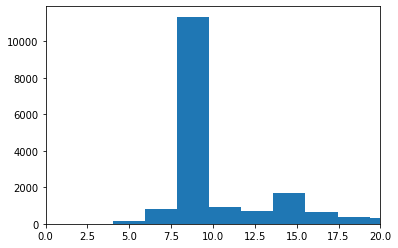

In [229]:
fig, ax = plt.subplots()
ax.hist(explainer_lengths['GotoLocation'], bins=50)
ax.set_xlim(0, 20)
plt.show()

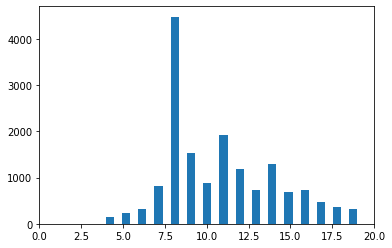

In [230]:
fig, ax = plt.subplots()
ax.hist(baseline_lengths['GotoLocation'], bins=200)
ax.set_xlim(0, 20)
plt.show()

## Error Analysis of Valid Unseen

In [234]:
explainer_unseen_results_p = '/root/home/legg/data_alfred/exp/model:seq2seq_im_mask,name:experiment_1_original_train_set_plus_all_failures_annotated_by_explainer/eval_results_max_f1/subgoal_unseen_results_20210624_202934_443852_epoch14.json'
with open(explainer_unseen_results_p, 'r') as f:
    explainer_unseen_results = json.load(f)
    
baseline_unseen_results_p = '/root/home/legg/data_alfred/exp/model:seq2seq_im_mask,name:experiment_1_original_train_set_plus_all_failures_annotated_by_baseline/eval_results_max_f1/subgoal_results_20210616_193333_549924.json'
with open(baseline_unseen_results_p, 'r') as f:
    baseline_unseen_results = json.load(f)

In [293]:
explainer_unseen_success_task_ids = {}
baseline_unseen_success_task_ids = {}

for k in keys:
    explainer_unseen_success_task_ids[k] = set([(t['trial'], t['subgoal_idx'], t['repeat_idx']) for t in explainer_unseen_results['successes'][k]])
    baseline_unseen_success_task_ids[k] = set([(t['trial'], t['subgoal_idx'], t['repeat_idx']) for t in baseline_unseen_results['successes'][k]])
    print(k)
    print('explainer successes:', len(explainer_unseen_success_task_ids[k]))
    print('baseline successes:', len(baseline_unseen_success_task_ids[k]))
    print('total unseen examples:', len(explainer_unseen_results['failures'][k]) + len(explainer_unseen_results['successes'][k]))
    print()

GotoLocation
explainer successes: 966
baseline successes: 984
total unseen examples: 2444

PickupObject
explainer successes: 336
baseline successes: 382
total unseen examples: 1113

ToggleObject
explainer successes: 101
baseline successes: 89
total unseen examples: 173

CleanObject
explainer successes: 59
baseline successes: 63
total unseen examples: 113

CoolObject
explainer successes: 108
baseline successes: 109
total unseen examples: 109

HeatObject
explainer successes: 127
baseline successes: 121
total unseen examples: 136

PutObject
explainer successes: 572
baseline successes: 597
total unseen examples: 937

SliceObject
explainer successes: 24
baseline successes: 27
total unseen examples: 105



In [295]:
explainer_unseen_failed_task_ids = {}
baseline_unseen_failed_task_ids = {}

for k in keys:
    explainer_unseen_failed_task_ids[k] = set([(t['trial'], t['subgoal_idx'], t['repeat_idx']) for t in explainer_unseen_results['failures'][k]])
    baseline_unseen_failed_task_ids[k] = set([(t['trial'], t['subgoal_idx'], t['repeat_idx']) for t in baseline_unseen_results['failures'][k]])
    print(k)
    print('explainer fails:', len(explainer_unseen_failed_task_ids[k]))
    print('baseline fails:', len(baseline_unseen_failed_task_ids[k]))
    print('total unseen examples:', len(explainer_unseen_results['failures'][k]) + len(explainer_unseen_results['successes'][k]))
    print()

GotoLocation
explainer fails: 1478
baseline fails: 1467
total unseen examples: 2444

PickupObject
explainer fails: 777
baseline fails: 734
total unseen examples: 1113

ToggleObject
explainer fails: 72
baseline fails: 84
total unseen examples: 173

CleanObject
explainer fails: 54
baseline fails: 50
total unseen examples: 113

CoolObject
explainer fails: 1
baseline fails: 0
total unseen examples: 109

HeatObject
explainer fails: 9
baseline fails: 15
total unseen examples: 136

PutObject
explainer fails: 365
baseline fails: 340
total unseen examples: 937

SliceObject
explainer fails: 81
baseline fails: 78
total unseen examples: 105



In [321]:
explainer_only_fails = {}
baseline_only_fails = {}

for k in keys:
    explainer_only_fails[k] = explainer_unseen_failed_task_ids[k] - baseline_unseen_failed_task_ids[k]
    baseline_only_fails[k] = baseline_unseen_failed_task_ids[k] - explainer_unseen_failed_task_ids[k]
    print(k)
    print('explainer fails  (baseline success):', len(explainer_only_fails[k]))
    print('baseline  fails (explainer success):', len(baseline_only_fails[k]))
    print('total unseen examples:', len(explainer_unseen_results['failures'][k]) + len(explainer_unseen_results['successes'][k]))
    print()

GotoLocation
explainer fails  (baseline success): 306
baseline  fails (explainer success): 295
total unseen examples: 2444

PickupObject
explainer fails  (baseline success): 133
baseline  fails (explainer success): 90
total unseen examples: 1113

ToggleObject
explainer fails  (baseline success): 21
baseline  fails (explainer success): 33
total unseen examples: 173

CleanObject
explainer fails  (baseline success): 16
baseline  fails (explainer success): 12
total unseen examples: 113

CoolObject
explainer fails  (baseline success): 1
baseline  fails (explainer success): 0
total unseen examples: 109

HeatObject
explainer fails  (baseline success): 3
baseline  fails (explainer success): 9
total unseen examples: 136

PutObject
explainer fails  (baseline success): 68
baseline  fails (explainer success): 43
total unseen examples: 937

SliceObject
explainer fails  (baseline success): 8
baseline  fails (explainer success): 5
total unseen examples: 105



In [ ]:
# Pick Up and Put

In [350]:
isntr_explainer_only_fails = [t['subgoal_instr'] for t in explainer_unseen_results['failures']['CoolObject'] if (t['trial'], t['subgoal_idx'], t['repeat_idx']) in set(explainer_only_fails['CoolObject'])]

In [347]:
isntr_baseline_only_fails = [t['subgoal_instr'] for t in baseline_unseen_results['failures']['CoolObject'] if (t['trial'], t['subgoal_idx'], t['repeat_idx']) in set(baseline_only_fails['CoolObject'])]

In [348]:
import numpy as np
np.mean([len(s) for s in isntr_explainer_only_fails])

69.0

In [349]:
import numpy as np
np.mean([len(s) for s in isntr_baseline_only_fails])

/home/user/miniconda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/user/miniconda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [353]:
random.sample(isntr_explainer_only_fails, 1)

['Chill the mug in the fridge then take it back out and close the door.']

In [354]:
random.sample(isntr_baseline_only_fails, 1)

ValueError: Sample larger than population or is negative

## Ignore below

In [235]:
explainer_unseen_results.keys() 

dict_keys(['failures', 'results', 'successes'])

In [236]:
explainer_unseen_results['failures']['PickupObject'][0]

{'repeat_idx': 1,
 'reward': -6.5800000000000045,
 'subgoal_idx': 1,
 'subgoal_instr': 'Pick up the metal spoon that is to the left of the phone on the counter.',
 'subgoal_path_len_weight': 1.0,
 'subgoal_path_len_weighted_success_spl': 0.0,
 'subgoal_success_spl': 0.0,
 'subgoal_type': 'PickupObject',
 'trial': 'trial_T20190907_155006_533262',
 'type': 'pick_and_place_with_movable_recep'}

In [306]:
explainer_unseen_failed_Pickup_task_ids = [t['trial'] for t in explainer_unseen_results['failures']['PickupObject']]

In [307]:
len(explainer_unseen_failed_Pickup_task_ids)

777

In [239]:
explainer_unseen_failed_Pickup_task_ids = set([t['trial'] for t in explainer_unseen_results['failures']['PickupObject']])
print('explainer fails',len(explainer_unseen_failed_Pickup_task_ids))

baseline_unseen_failed_Pickup_task_ids = set([t['trial'] for t in baseline_unseen_results['failures']['PickupObject']])
print('baseline fails',len(baseline_unseen_failed_Pickup_task_ids))

explainer fails 202
baseline fails 190


In [240]:
len(explainer_unseen_failed_Pickup_task_ids - baseline_unseen_failed_Pickup_task_ids)

25

In [241]:
len(baseline_unseen_failed_Pickup_task_ids - explainer_unseen_failed_Pickup_task_ids)

13

In [242]:
explainer_only_fails_Pickup_task_ids = explainer_unseen_failed_Pickup_task_ids - baseline_unseen_failed_Pickup_task_ids

In [308]:
explainer_only_fails_Pickup_tasks = [t for t in explainer_unseen_results['failures']['PickupObject'] if t['trial'] in explainer_only_fails_Pickup_task_ids]

In [309]:
explainer_only_fails_Pickup_tasks = [(t['subgoal_type'], t['subgoal_instr']) for t in explainer_unseen_results['failures']['PickupObject'] if t['trial'] in explainer_only_fails_Pickup_task_ids]

In [244]:
explainer_only_fails_Pickup_tasks

[{'repeat_idx': 0,
  'reward': -5.55,
  'subgoal_idx': 1,
  'subgoal_instr': 'Pick up the apple in the trash bin',
  'subgoal_path_len_weight': 1.0,
  'subgoal_path_len_weighted_success_spl': 0.0,
  'subgoal_success_spl': 0.0,
  'subgoal_type': 'PickupObject',
  'trial': 'trial_T20190908_145356_918528',
  'type': 'pick_heat_then_place_in_recep'},
 {'repeat_idx': 2,
  'reward': -3.9000000000000017,
  'subgoal_idx': 1,
  'subgoal_instr': 'Pick up the apple that is in the near right corner of the can.',
  'subgoal_path_len_weight': 1.0,
  'subgoal_path_len_weighted_success_spl': 0.0,
  'subgoal_success_spl': 0.0,
  'subgoal_type': 'PickupObject',
  'trial': 'trial_T20190908_145356_918528',
  'type': 'pick_heat_then_place_in_recep'},
 {'repeat_idx': 1,
  'reward': -5.499999999999997,
  'subgoal_idx': 1,
  'subgoal_instr': 'Take the green apple on the right out of the trash can.',
  'subgoal_path_len_weight': 1.0,
  'subgoal_path_len_weighted_success_spl': 0.0,
  'subgoal_success_spl': 0.0,

In [257]:
len(explainer_only_fails_Pickup_tasks)

60

In [245]:
# Which environments are these from????

splits_p = '/root/home/legg/data_alfred/splits/data_augmentation_experiment1_20200826_redo20210608.json'

with open(splits_p, 'r') as f:
    splits = json.load(f)

In [310]:
valid_unseen_envs = set()
task_to_env_lookup = {}

for task in splits['valid_unseen']:
    rm = task['task'].split('/')[-2].split('-')[-1]
    trial = task['task'].split('/')[-1]
    task_to_env_lookup[trial] = rm
    valid_unseen_envs.add(rm)
    
len(valid_unseen_envs)

4

In [247]:
task_to_env_lookup

{'trial_T20190908_044113_026049': '219',
 'trial_T20190907_020258_749030': '10',
 'trial_T20190909_061130_844814': '10',
 'trial_T20190907_155006_533262': '10',
 'trial_T20190906_191501_563086': '10',
 'trial_T20190912_221141_608117': '10',
 'trial_T20190909_061838_159982': '10',
 'trial_T20190908_145356_918528': '10',
 'trial_T20190907_171035_866841': '219',
 'trial_T20190907_161235_786153': '308',
 'trial_T20190907_133953_562557': '308',
 'trial_T20190907_171933_349922': '10',
 'trial_T20190908_032518_891433': '10',
 'trial_T20190909_120632_691361': '10',
 'trial_T20190907_221208_560499': '10',
 'trial_T20190908_073749_086690': '10',
 'trial_T20190909_213642_049125': '10',
 'trial_T20190909_032740_934457': '219',
 'trial_T20190907_161817_163233': '10',
 'trial_T20190907_004321_405868': '424',
 'trial_T20190908_122024_052056': '308',
 'trial_T20190907_194135_468990': '10',
 'trial_T20190907_103041_110705': '219',
 'trial_T20190906_180922_517529': '219',
 'trial_T20190907_040327_147149

In [247]:
task_to_env_lookup

{'trial_T20190908_044113_026049': '219',
 'trial_T20190907_020258_749030': '10',
 'trial_T20190909_061130_844814': '10',
 'trial_T20190907_155006_533262': '10',
 'trial_T20190906_191501_563086': '10',
 'trial_T20190912_221141_608117': '10',
 'trial_T20190909_061838_159982': '10',
 'trial_T20190908_145356_918528': '10',
 'trial_T20190907_171035_866841': '219',
 'trial_T20190907_161235_786153': '308',
 'trial_T20190907_133953_562557': '308',
 'trial_T20190907_171933_349922': '10',
 'trial_T20190908_032518_891433': '10',
 'trial_T20190909_120632_691361': '10',
 'trial_T20190907_221208_560499': '10',
 'trial_T20190908_073749_086690': '10',
 'trial_T20190909_213642_049125': '10',
 'trial_T20190909_032740_934457': '219',
 'trial_T20190907_161817_163233': '10',
 'trial_T20190907_004321_405868': '424',
 'trial_T20190908_122024_052056': '308',
 'trial_T20190907_194135_468990': '10',
 'trial_T20190907_103041_110705': '219',
 'trial_T20190906_180922_517529': '219',
 'trial_T20190907_040327_147149

In [248]:
explainer_only_fails_Pickup_task_ids

{'trial_T20190906_185459_653538',
 'trial_T20190906_185515_986084',
 'trial_T20190906_185530_954329',
 'trial_T20190906_214631_761426',
 'trial_T20190907_004351_281384',
 'trial_T20190907_004404_604165',
 'trial_T20190907_074045_109439',
 'trial_T20190907_161210_531813',
 'trial_T20190907_161817_163233',
 'trial_T20190907_171850_960211',
 'trial_T20190907_183807_477267',
 'trial_T20190908_020048_814402',
 'trial_T20190908_021510_064551',
 'trial_T20190908_021537_611374',
 'trial_T20190908_022321_380927',
 'trial_T20190908_022345_347148',
 'trial_T20190908_122154_042763',
 'trial_T20190908_125200_737896',
 'trial_T20190908_145356_918528',
 'trial_T20190909_021247_306737',
 'trial_T20190909_042101_443154',
 'trial_T20190909_102608_318800',
 'trial_T20190909_121559_082363',
 'trial_T20190909_121710_650938',
 'trial_T20190910_122059_929600'}

In [311]:
# 10, 36from collections import defaultdict45# 10, 36
from collections import defaultdict

##### explainer_only_fail_by_env_count = defaultdict(int)
for task_id in explainer_only_fails_Pickup_task_ids:
    explainer_only_fail_by_env_count[task_to_env_lookup[task_id]] += 1

In [251]:
explainer_only_fail_by_env_count

defaultdict(int, {'308': 8, '424': 7, '10': 9, '219': 1})

In [252]:
explainer_unseen_failed_Pickup_task_ids

{'trial_T20190906_182259_116320',
 'trial_T20190906_182353_418140',
 'trial_T20190906_184021_215264',
 'trial_T20190906_185459_653538',
 'trial_T20190906_185515_986084',
 'trial_T20190906_185530_954329',
 'trial_T20190906_191429_743650',
 'trial_T20190906_191445_723170',
 'trial_T20190906_191501_563086',
 'trial_T20190906_202903_584090',
 'trial_T20190906_202926_527010',
 'trial_T20190906_203003_627271',
 'trial_T20190906_213857_471360',
 'trial_T20190906_213926_964767',
 'trial_T20190906_214631_761426',
 'trial_T20190906_214648_973919',
 'trial_T20190906_214706_219505',
 'trial_T20190906_224631_058932',
 'trial_T20190906_224718_745017',
 'trial_T20190906_224843_443882',
 'trial_T20190907_004351_281384',
 'trial_T20190907_004404_604165',
 'trial_T20190907_020329_050110',
 'trial_T20190907_020403_745438',
 'trial_T20190907_033157_424297',
 'trial_T20190907_033228_194678',
 'trial_T20190907_033306_962974',
 'trial_T20190907_050942_897916',
 'trial_T20190907_051013_060265',
 'trial_T20190

In [253]:
explainer_fail_by_env_count = defaultdict(int)
for task_id in explainer_unseen_failed_Pickup_task_ids:
    explainer_fail_by_env_count[task_to_env_lookup[task_id]] += 1
    
explainer_fail_by_env_count

defaultdict(int, {'308': 30, '10': 116, '424': 25, '219': 31})

In [254]:
baseline_fail_by_env_count = defaultdict(int)
for task_id in baseline_unseen_failed_Pickup_task_ids:
    baseline_fail_by_env_count[task_to_env_lookup[task_id]] += 1
    
baseline_fail_by_env_count

defaultdict(int, {'308': 24, '10': 117, '219': 31, '424': 18})

In [ ]:
type_to_variations = {
    ' alarmclock ' : [' alarm clock ', ' clock ', ' alarm '],
    ' armchair ' : [' arm chair '],
    ' couch ' : ['sofa'],
    ' baseballbat ': [' baseball bat ', ' bat '],
    ' basketball ' : [' basket ball '],
    ' bathtub ' : [' bath tub ', ' bathtubbasin ', ' bathtub basin '],
    ' cabinet ': [' cupboard '],
    ' cellphone ': [' cell phone ', ' phone ', ' mobilephone ', ' mobile phone '],
    ' cloth ': [' rag ']
    ' coffeemachine ': [' coffee machine ', ' coffeemaker ', ' coffee maker ', ' coffee maker machine '],
    ' countertop ': [' counter ', ' counter top ', ' island ', ' kitchen island '],
    ' creditcard ': [' credit card ', ' card '],
    ' cup ': [' mug '],
    ' curtains ': [' curtain '],
    ' table ': [' desk ', ' study desk ', ' studydesk ',' work desk ', ' workdesk '],
    ' desk lamp ': [' desklamp ', ' desk light ', ' desklight '],
    ' dishsponge ': [' dish sponge ', ' sponge '],
    ' floorlamp ': [' floor lamp ', ' lamp '],
    ' footstool ': [' foot stool ', ' stool '],
    ' fridge ': [' refrigerator '],
    ' garbagecan ': [' garbage can ', ' garbage bin ', ' trashcan ', ' trash can ', ' trash bin '],
    ' bottle ': [' glass bottle ', ' bottle ', ' glassbottle '],
    ' handtowel ': [' hand towel ', ' towel '],
    ' towelholder ': [' handtowel holder ', ' towel holder ', ' towelholder ', ' hand towel holder ', ' towelrack ', ' towel rack '],
    ' houseplant ': [' house plant ', ' plant '],
    ' knife ': [' butterknife ', ' butter knife '],
    ' laptop ': [' computer ', ' lap top '],
    ' laundryhamper ': [' laundry hamper ', ' hamper ', ' laundry basket ', ' laundrybasket '],
    ' laundryhamperlid ': [' laundry hamper lid ', ' laundry basket lid ', ' hamper lid ', ' basket lid '],
    ' lightswitch ': [' light switch '],
    ' mug ': [' cup '],
    ' papertowel ': [' paper towel '],
    ' papertowelroll ': [' papertowel roll ', ' paper towel roll '],
    ' peppershaker ': [' pepper shaker '],
    ' remotecontrol ': [' remote control ', ' remote '],
    ' saltshaker ': [' salt shaker '],
    ' brush ': [' scrub brush ', ' scrubbrush '],
    ' showerdoor ': [' shower door '],
    ' showerglass ': [' shower glass '],
    ' sinkbasin ': [' sink basin ', ' basin ', ' sink '],
    ' soapbar ': [' soap bar ', ' soap '],
    ' soapbottle ': [' soap bottle '],
    ' spraybottle ': [' spray bottle '],
    ' stoveburner ': [' stove burner ', ' stove ', ' burner '],
    ' stoveknob ': [' stove knob ', ' stove switch ', ' knob ', ' switch '],
    ' diningtable ': [' dining table '],
    ' coffeetable ': [' coffee table '],
    ' sidetable ': [' side table '],
    ' teddybear ': [' teddy bear ', ' bear '],
    ' tennisracket ': [' tennis racket ', ' racket '],
    ' tissuebox ': [' tissue box '],
    ' toiletpaper ': [' toilet paper '],
    ' toiletpaperhanger ': [' toilet paper hanger ', ' toiletpaper hanger '],
    ' toiletpaperroll ': [' toilet paper roll ', ' toiletpaper roll '],
    ' tvstand ': [' tv stand ', ' television stand ', ' televisionstand '],
    ' tv ': [' television '],
    ' wateringcan ': [' watering can '],
    ' winebottle ': [' wine bottle '],
}